# 🚗 Spinny Used Car Price Prediction
### 📌 Overview
This project aims to predict used car prices listed on Spinny using regression models. It mimics the work of a Price Analyst, providing estimated car values based on various features.

We used the Car Details v3 dataset from Kaggle and built a clean and interactive Streamlit web app with visualizations and model predictions.

### 🚀Objective: 
Predict selling prices based on features like age, mileage, fuel type, and brand.

### 🛠️ Tools & Libraries
- **Language:** Python
- **Libraries:**
    - Data: NumPy, Pandas
    - Visualization: Matplotlib, Seaborn
    - Modeling: Scikit-learn, XGBoost

### 🧠 Machine Learning Models Used
- Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- XGBoost Regressor

### 📊 Dataset Overview
- **Dataset Source:** Kaggle – Car Details v3
- **Total Entries:** 8128 rows
- **Columns:** 13 features (like year, selling_price, km_driven, fuel, mileage, etc.)

# 📝 Data Loading and Preprocessing

In [95]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import os
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [45]:
# Load dataset
data = pd.read_csv('../data/car_details.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [46]:
# Check data info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


In [47]:
# Check Shape of Data
print(data.shape)

(8128, 13)


# 🧹 Data Cleaning

In [48]:
# Check data contains missing values
# Total missing values
missing_counts = data.isnull().sum()

# Percentage of missing values
missing_percent = (missing_counts / len(data)) * 100

# Combine into one DataFrame for better view
missing_data = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage': missing_percent.round(2)
})

# Only show columns with missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)


           Missing Values  Percentage
mileage               221        2.72
engine                221        2.72
max_power             215        2.65
torque                222        2.73
seats                 221        2.72


**🔎 Initial Observations:**
- Some columns had missing values (`mileage`, `engine`, `max_power`, `torque, seats`)
- Columns like `mileage`, `engine`, and `max_power` had strings with units (e.g. "23.4 kmpl")

In [49]:
# Handling Missing Values:
# Columns with missing < 5%
to_drop = missing_data[missing_data['Percentage'] < 5].index
# Drop rows where these columns have missing values
data = data.dropna(subset=to_drop)

# 2. Clean the strings (remove units)
# Clean and convert to float
data['mileage'] = data['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
data['engine'] = data['engine'].str.replace(' CC', '').astype(float)
data['max_power'] = data['max_power'].str.replace(' bhp', '').astype(float)

display(data.head())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [50]:
# Check if data contains missing values now
print(data.isnull().sum())
print(data.info())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float64
 10  max_power      7906 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          79

**🧼 Cleaning Process:**
1. Checked Missing Values
    - All missing % < 5%
    - Dropped rows with missing values in those columns
<br>
2. Removed units from strings and converted to float:
    - `mileage`: "23.4 kmpl" → 23.4
    - `engine:` "1248 CC" → 1248
    - `max_power`: "74 bhp" → 74
<br>
3. Final Dataset Shape: 7906 rows × 13 columns
    - No nulls left
    - Data types fixed

In [51]:
data['torque']

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
8126          140Nm@ 1800-3000rpm
8127          140Nm@ 1800-3000rpm
Name: torque, Length: 7906, dtype: object

In [52]:
# Descriptive Analysis
display(data.describe())

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


# 🔍 Step-by-Step EDA

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define theme colors
theme_colors = ["#D72638", "#4B0082", "#8A2BE2"]  # Red, Indigo, Violet
lighter_colors = ["#dc0527", "#4B0082", "#ff7b00"]  # Lighter shades


# Set style for black background
plt.style.use('dark_background')
sns.set_palette(theme_colors)

# General aesthetic settings
plt.rcParams.update({
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'text.color': 'black',
    'axes.titleweight': 'bold',
    'axes.titlesize': 14,
    'axes.titlecolor': 'black'
})

plt.rcParams.update({
    'axes.facecolor': 'black',
    'figure.facecolor': 'black',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'lightgrey',
    'ytick.color': 'lightgrey',
    'text.color': 'white',
    'axes.titleweight': 'bold',
    'axes.titlesize': 14,
    'axes.titlecolor': 'white'
})

sns.set_style("darkgrid", {
    'axes.facecolor': 'black',
    'grid.color': 'grey',
    'grid.linestyle': '--'
})

# Customize plot border color to dark grey
plt.rcParams['axes.edgecolor'] = '#4A4A4A'
plt.rcParams['axes.linewidth'] = 0.4

# Set style for black background
plt.style.use('dark_background')


## 1. Basic Distribution Plots
See how the numeric features are spread out.


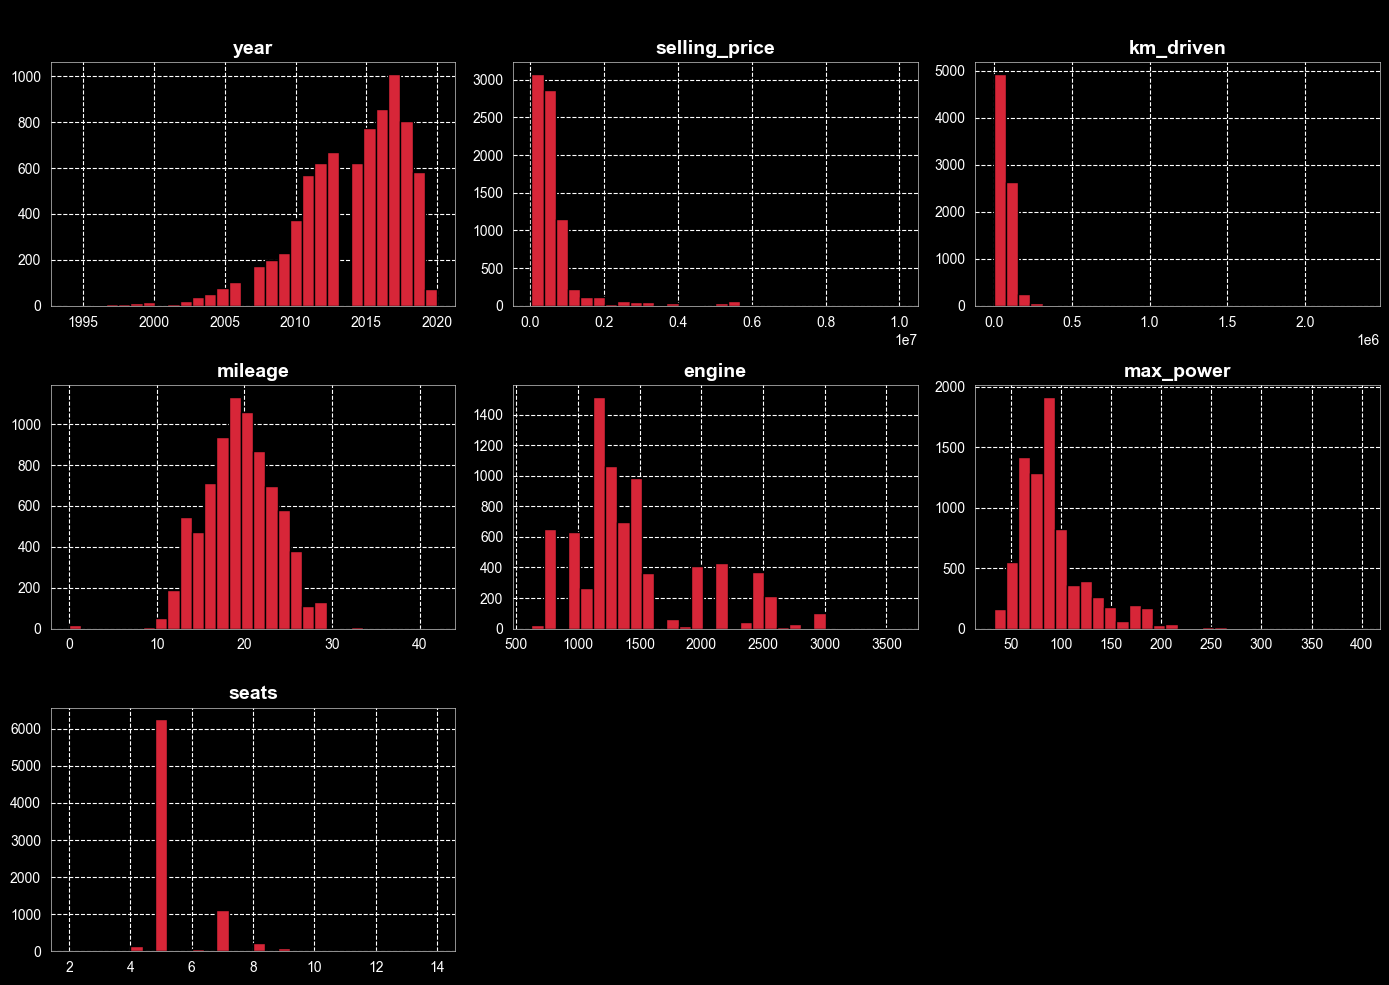

In [164]:
num_cols = ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
data[num_cols].hist(figsize=(14, 10), bins=30, edgecolor='black', color=theme_colors[0])
plt.suptitle('Distribution of Numeric Features', fontsize=16, color='black')
plt.tight_layout()
plt.show()


#### Observation:
- Many of the numeric variables (like selling price, km driven, mileage, engine size, and max power) show wide ranges.
- Distributions such as selling price and km driven might be right-skewed, suggesting the presence of a few very high values (outliers) relative to most data points.
- Histograms of variables like engine size and max power may hint at multimodal tendencies, perhaps indicating different market segments or car types.

## 2. Selling Price Distribution

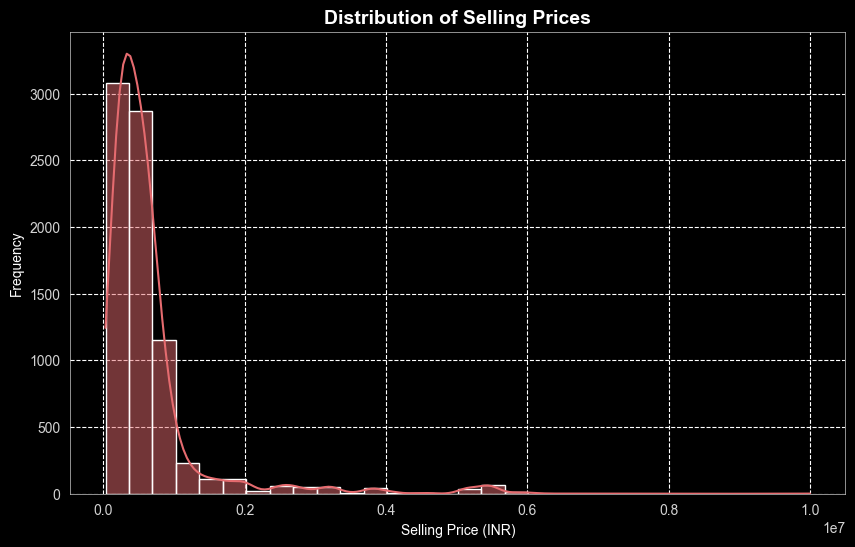

In [173]:
# Plot price distribution
plt.figure(figsize=(10, 6), facecolor='black')
ax = sns.histplot(data['selling_price'], bins=30, kde=True, color=theme_colors[1])

# Customize plot elements
ax.set_title('Distribution of Selling Prices', color='white')
ax.set_xlabel('Selling Price (INR)', color='white')
ax.set_ylabel('Frequency', color='white')

# Set background and tick label colors
ax.set_facecolor('black')
ax.tick_params(axis='x', colors='lightgrey')
ax.tick_params(axis='y', colors='lightgrey')

# Save & show
plt.savefig('../visuals/price_distribution.png', facecolor='black')
plt.show()


#### Observation:
- The distribution of selling prices is right-skewed, with most cars priced below ₹2,00,000.
- A small number of cars have very high selling prices, creating a long tail in the distribution.

## 3. Yearwise Analysis of Selling Price, Kilometer Driven and Mileage

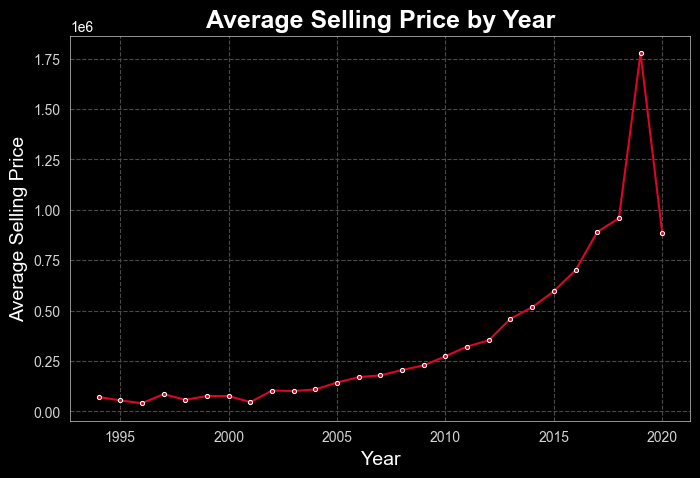

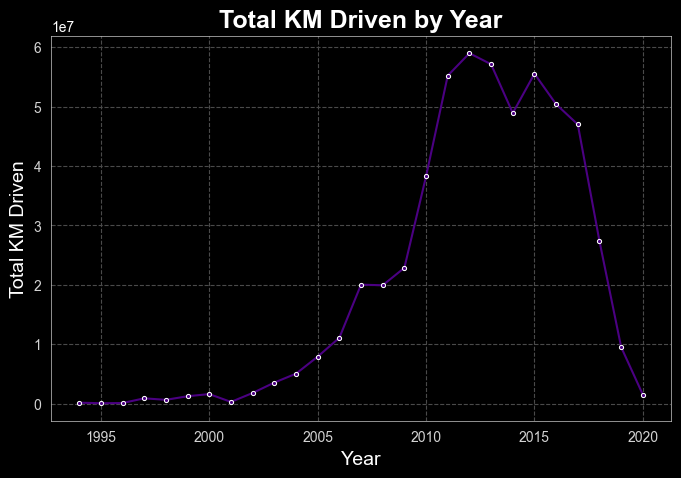

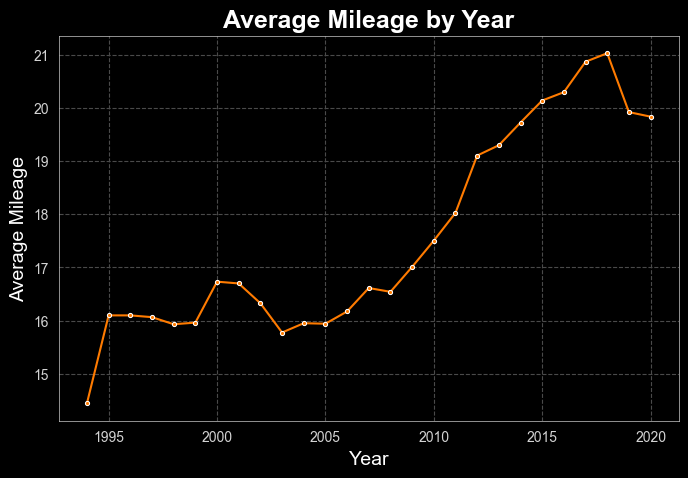

In [180]:
# Line Chart 1: Average Selling Price by Year
plt.figure(figsize=(8, 5))
sns.lineplot(x='year', y='selling_price', data=data.groupby('year')['selling_price'].mean().reset_index(), color=lighter_colors[0], marker='.')
plt.title('Average Selling Price by Year', color='#FFFFFF', fontsize=18, fontweight='bold')
plt.xlabel('Year', color='#FFFFFF', fontsize=14)
plt.ylabel('Average Selling Price', color='#FFFFFF', fontsize=14)
plt.xticks(color='#D3D3D3', fontsize=10)
plt.yticks(color='#D3D3D3', fontsize=10)
plt.grid(True, color='#4A4A4A')
plt.savefig('../visuals/Average Selling Price by Year.png', facecolor='black', bbox_inches='tight')
plt.show()

# Line Chart 2: Total KM Driven by Year
plt.figure(figsize=(8, 5))
sns.lineplot(x='year', y='km_driven', data=data.groupby('year')['km_driven'].sum().reset_index(), color=lighter_colors[1], marker='.')
plt.title('Total KM Driven by Year', color='#FFFFFF', fontsize=18, fontweight='bold')
plt.xlabel('Year', color='#FFFFFF', fontsize=14)
plt.ylabel('Total KM Driven', color='#FFFFFF', fontsize=14)
plt.xticks(color='#D3D3D3', fontsize=10)
plt.yticks(color='#D3D3D3', fontsize=10)
plt.grid(True, color='#4A4A4A')
plt.savefig('../visuals/Total KM Driven by Year.png', facecolor='black', bbox_inches='tight')
plt.show()

# Line Chart 3: Average Mileage by Year
plt.figure(figsize=(8, 5))
sns.lineplot(x='year', y='mileage', data=data.groupby('year')['mileage'].mean().reset_index(), color=lighter_colors[2], marker='.')
plt.title('Average Mileage by Year', color='#FFFFFF', fontsize=18, fontweight='bold')
plt.xlabel('Year', color='#FFFFFF', fontsize=14)
plt.ylabel('Average Mileage', color='#FFFFFF', fontsize=14)
plt.xticks(color='#D3D3D3', fontsize=10)
plt.yticks(color='#D3D3D3', fontsize=10)
plt.grid(True, color='#4A4A4A')
plt.savefig('../visuals/Average Mileage by Year.png', facecolor='black', bbox_inches='tight')
plt.show()

#### Observation:
**1. Average Selling Price by Year:**
- Average selling prices rise steadily from 2006 to 2020, reflecting newer cars’ higher market value.
  
**2. Total KM Driven by Year:**
- Total kilometers driven peak in recent years (e.g., 2018–2020), indicating higher usage or more data points for newer cars.
  
**3. Average Mileage by Year:**
- Average mileage fluctuates slightly, with a gradual increase in efficiency (e.g., 17–23 kmpl) as newer, fuel-efficient models emerge.

## 4. Bar Plots: Average Selling Price Vs Fuel Type and Average Max Power vs Owner Type

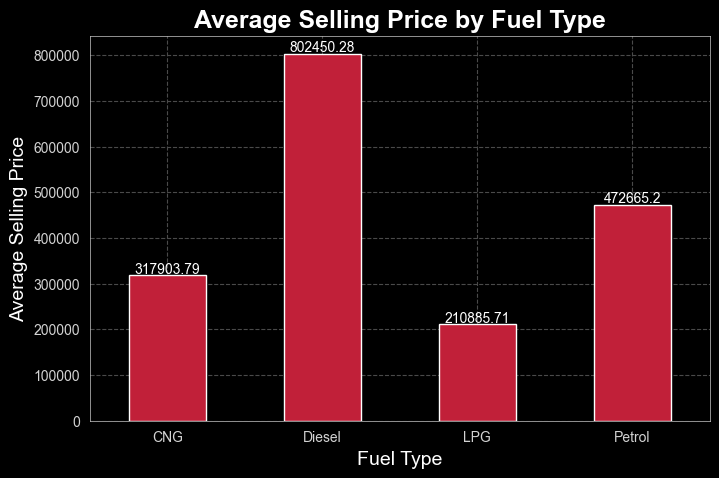

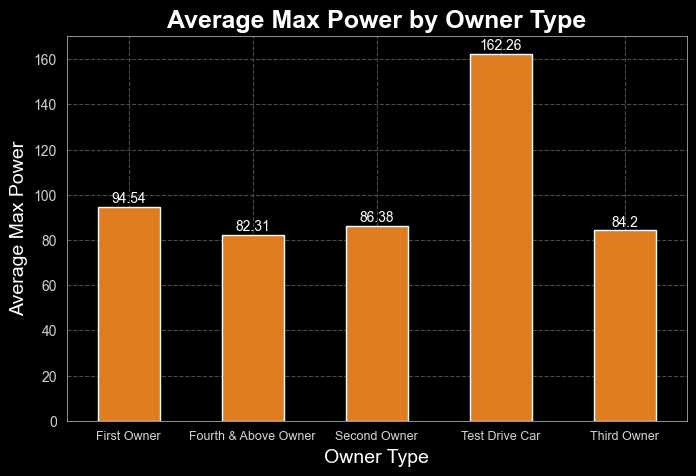

In [177]:
# Bar Chart 1: Average Selling Price by Fuel Type
plt.figure(figsize=(8, 5))
sns.barplot(x='fuel', y='selling_price', data=data.groupby('fuel')['selling_price'].mean().reset_index(), color=lighter_colors[0], width=0.5)
plt.title('Average Selling Price by Fuel Type', color='#FFFFFF', fontsize=18, fontweight='bold')
plt.xlabel('Fuel Type', color='#FFFFFF', fontsize=14)
plt.ylabel('Average Selling Price', color='#FFFFFF', fontsize=14)
plt.xticks(color='#D3D3D3', fontsize=10)
plt.yticks(color='#D3D3D3', fontsize=10)
plt.grid(True, color='#4A4A4A')
# Add data labels above bars
for i, v in enumerate(data.groupby('fuel')['selling_price'].mean().values):
    plt.text(i, v + 5000, str(round(v, 2)), color='#FFFFFF', ha="center", fontsize=10)
plt.savefig('../visuals/Average Selling Price by Fuel Type.png', facecolor='black', bbox_inches='tight')
plt.show()

# Bar Chart 4: Average Max Power by Owner Type
plt.figure(figsize=(8, 5))
sns.barplot(x='owner', y='max_power', data=data.groupby('owner')['max_power'].mean().reset_index(), color=lighter_colors[2], width=0.5)
plt.title('Average Max Power by Owner Type', color='#FFFFFF', fontsize=18, fontweight='bold')
plt.xlabel('Owner Type', color='#FFFFFF', fontsize=14)
plt.ylabel('Average Max Power', color='#FFFFFF', fontsize=14)
plt.xticks(color='#D3D3D3', fontsize=9, rotation=0)
plt.yticks(color='#D3D3D3', fontsize=10)
plt.grid(True, color='#4A4A4A')
# Add data labels above bars
for i, v in enumerate(data.groupby('owner')['max_power'].mean().values):
    plt.text(i, v + 2, str(round(v, 2)), color='#FFFFFF', ha="center", fontsize=10)
plt.savefig('../visuals/Average Max Power by Owner Type.png', facecolor='black', bbox_inches='tight')
plt.show()

#### Observation:
**1. Average Selling Price by Fuel Type:**
- Diesel and Petrol cars show higher average selling prices than CNG or LPG, likely due to demand for conventional fuel types.

**2. Average Max Power by Owner Type:**
- Test Drive Cars and First owners tend to have cars with higher average max power, suggesting they retain more powerful or newer vehicles.

## 5. Fuel, Seller, Owner – Categorical Breakdown

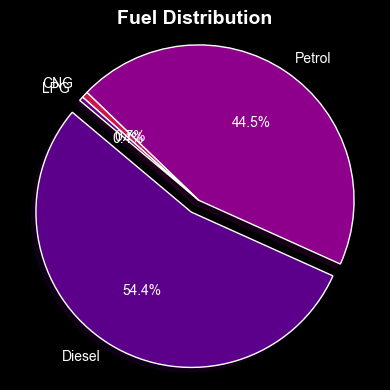

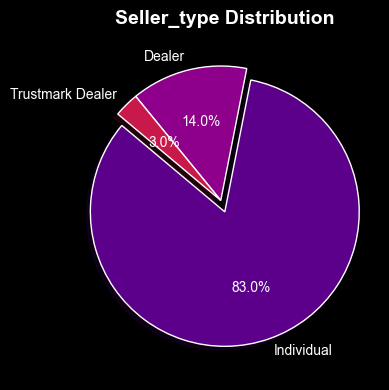

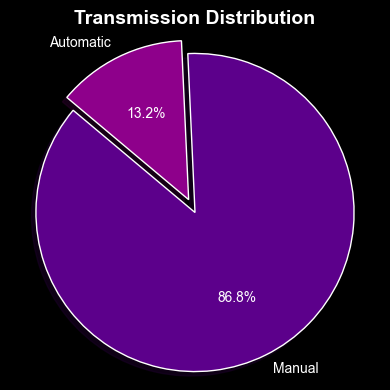

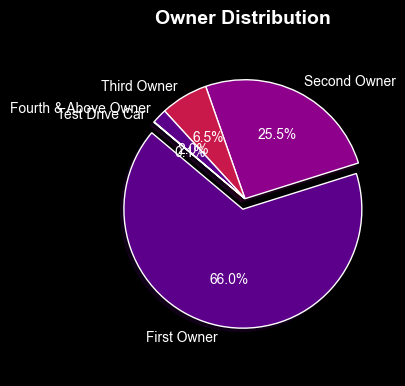

In [168]:
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']

# Define your save directory
save_dir = r"C:\Users\vaish\Projects\Spinny Car Price Prediction\visuals"

# Just making sure the folder exists
os.makedirs(save_dir, exist_ok=True)

theme_colors = ["#5c008b", "#8e008b", "#c9184a"]  # Red, Indigo, Violet
sns.set_palette(theme_colors)

for col in cat_cols:
    plt.figure(figsize=(4, 4), facecolor='black')  # Set figure background to black
    counts = data[col].value_counts()
    explode = [0.09 if i == 0 else 0 for i in range(len(counts))]  # Pop out the biggest slice
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, 
            colors=theme_colors, explode=explode, shadow=True, textprops={'color': 'white'})
    plt.title(f'{col.capitalize()} Distribution', color='white')  # Title color white
    plt.axis('equal')
    plt.tight_layout()
    # Save & show
    save_path = os.path.join(save_dir, f'{col}_distribution.png')
    plt.savefig(save_path, facecolor='black')
    plt.show()



#### Observation:
**1. Fuel Distribution**
- Diesel and petrol cars dominate the market, with petrol cars making up 54.4% and diesel cars 44.5%.
- LPG and CNG cars have minimal representation in the dataset.

**2. Seller Type Distribution**
- Individual sellers account for 83% of the market, while dealers make up 14%.
- Trustmark dealers represent only 3% of the sellers.

**3. Transmission Distribution**
- Manual transmission cars dominate the market, accounting for 86.8% of the dataset.
- Automatic transmission cars make up only 13.2%.

**4. Owner Distribution**
- First-owner cars dominate the market, making up 66% of the dataset.
- Second-owner cars account for 25.5%, while third-owner and fourth-owner cars have smaller shares.


## 6. Correlation Heatmap (Numeric features only)

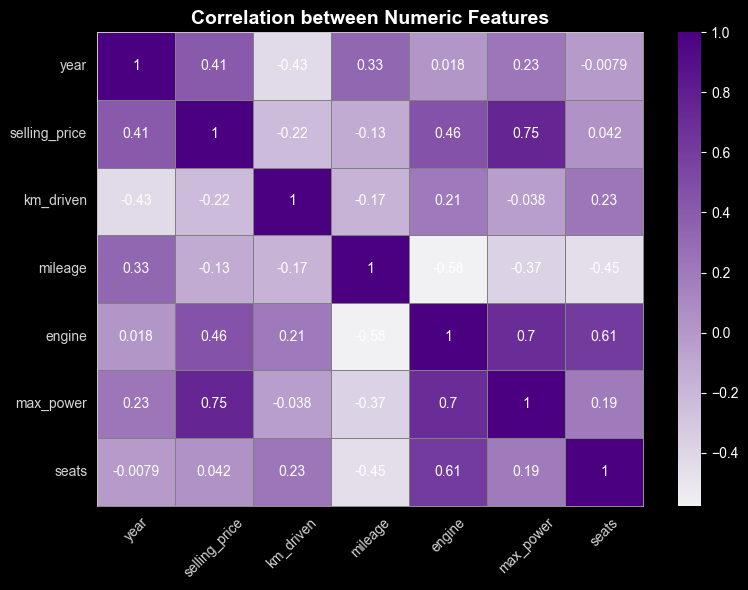

In [169]:
# Set dark background
plt.figure(figsize=(8, 6), facecolor='black')

# Heatmap with customized styles
ax = sns.heatmap(
    data[num_cols].corr(),
    annot=True,
    cmap=sns.light_palette("#4B0082", as_cmap=True),  # Lighter shade of cyan, can change to match theme
    linewidths=0.5,
    linecolor='grey',  # Light grey grid lines
    annot_kws={'color': 'white'}
)

# Customize axes
ax.set_facecolor("black")
ax.set_title('Correlation between Numeric Features', color='white')
ax.tick_params(axis='x', colors='lightgrey', labelrotation=45)
ax.tick_params(axis='y', colors='lightgrey', labelrotation=0)

# Set spines (border lines) color if needed
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('white')

# Set the overall plot background to black
plt.gcf().patch.set_facecolor('black')

plt.tight_layout()
# Save & show
plt.savefig('../visuals/correlation_matrix.png', facecolor='black')
plt.show()


#### Observation:

- Selling price has a strong positive correlation with engine size (r=0.46) and max power (r=0.75).
- Mileage has a negative correlation with engine size and max power, indicating that larger engines and higher power may reduce mileage.
- Year has a moderate positive correlation with selling price (r=0.41).

## 7. Selling Price vs Mileage / Power / Engine

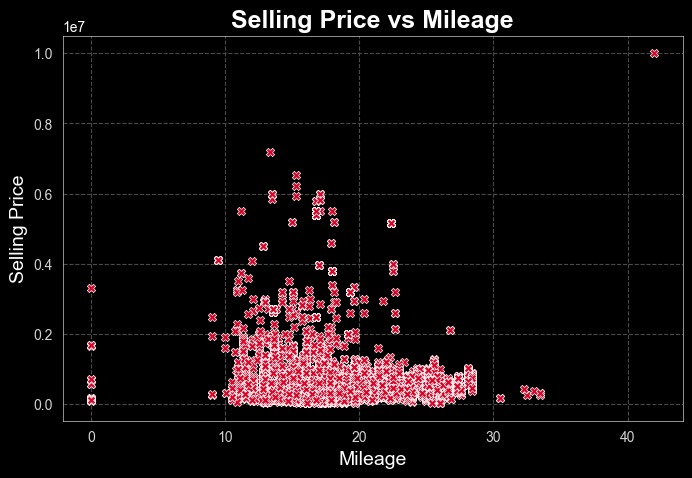

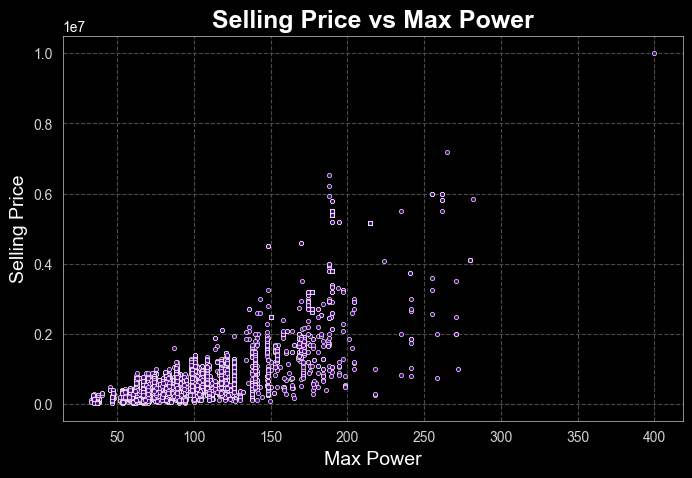

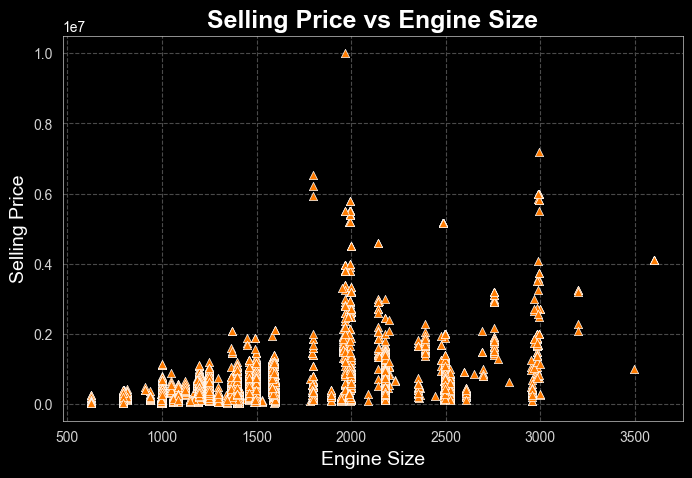

In [197]:
# Define theme colors
theme_colors = ["#D72638", "#e56b6f", "#8A2BE2"]  # Red, Light Red, Violet
lighter_colors = ["#dc0527", "#4B0082", "#ff7b00"]  # Lighter shades


# Set style for black background
plt.style.use('dark_background')

# Scatter Plot 1: Selling Price vs Mileage
plt.figure(figsize=(8, 5))
sns.scatterplot(x='mileage', y='selling_price', data=data, color=lighter_colors[0],  marker='X')
plt.title('Selling Price vs Mileage', color='#FFFFFF', fontsize=18, fontweight='bold')
plt.xlabel('Mileage', color='#FFFFFF', fontsize=14)
plt.ylabel('Selling Price', color='#FFFFFF', fontsize=14)
plt.xticks(color='#D3D3D3' , fontsize=10)
plt.yticks(color='#D3D3D3', fontsize=10)
plt.grid(True, color='#4A4A4A')
plt.savefig('../visuals/Selling Price vs Mileage.png', facecolor='black', bbox_inches='tight')
plt.show()

# Scatter Plot 2: Selling Price vs Max Power
plt.figure(figsize=(8, 5))
sns.scatterplot(x='max_power', y='selling_price', data=data, color=lighter_colors[1],  marker='.')
plt.title('Selling Price vs Max Power', color='#FFFFFF', fontsize=18, fontweight='bold')
plt.xlabel('Max Power', color='#FFFFFF', fontsize=14)
plt.ylabel('Selling Price', color='#FFFFFF', fontsize=14)
plt.xticks(color='#D3D3D3', fontsize=10)
plt.yticks(color='#D3D3D3', fontsize=10)
plt.grid(True, color='#4A4A4A')
plt.savefig('../visuals/Selling Price vs Max Power.png', facecolor='black', bbox_inches='tight')
plt.show()

# Scatter Plot 3: Selling Price vs Engine Size
plt.figure(figsize=(8, 5))
sns.scatterplot(x='engine', y='selling_price', data=data, color=lighter_colors[2],  marker='^')
plt.title('Selling Price vs Engine Size', color='#FFFFFF', fontsize=18, fontweight='bold')
plt.xlabel('Engine Size', color='#FFFFFF', fontsize=14)
plt.ylabel('Selling Price', color='#FFFFFF', fontsize=14)
plt.xticks(color='#D3D3D3', fontsize=10)
plt.yticks(color='#D3D3D3', fontsize=10)
plt.grid(True, color='#4A4A4A')
plt.savefig('../visuals/Selling Price vs Engine Size.png', facecolor='black', bbox_inches='tight')
plt.show()

#### Observation:
**1. Selling Price vs. Mileage**
- There is no clear linear relationship between selling price and mileage.
- Most cars with mileage between 15–25 kmpl have a wide range of selling prices.
- Outliers are present, with some cars having very high selling prices despite average mileage.

**2. Selling Price vs. Max Power**
- Selling price increases with max power, indicating a positive relationship.
- Cars with higher max power tend to have higher selling prices.
- A few outliers exist with very high max power and selling prices.

**3. Selling Price vs. Engine Size**
- Selling price generally increases with engine size.
- Cars with larger engines tend to have higher selling prices.
- Outliers are present, with some cars having very high selling prices despite average engine sizes.


## 8. Selling Price vs Other Features

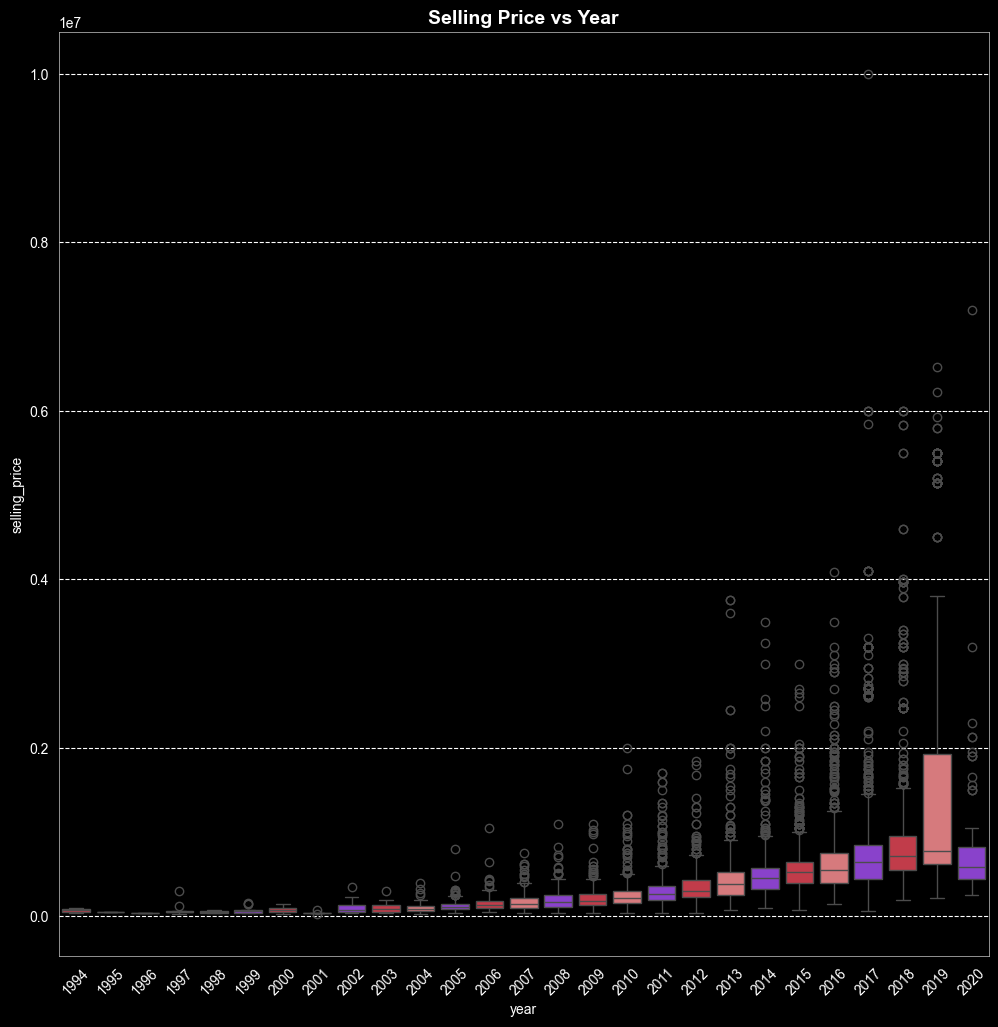

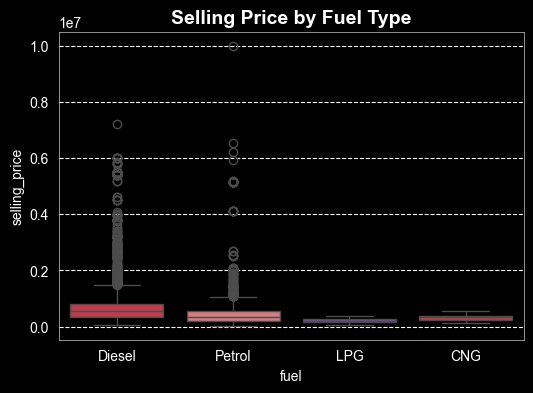

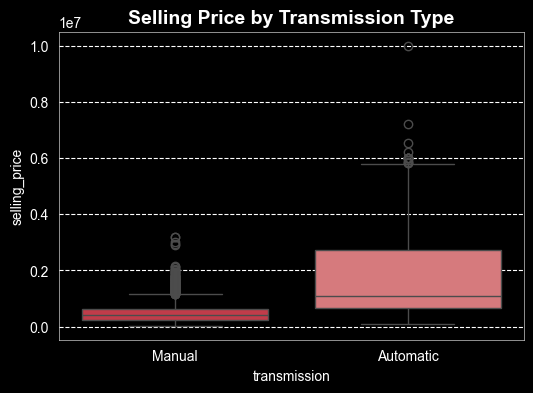

In [171]:
# Selling price vs year
plt.figure(figsize=(12,12))
sns.boxplot(x='year', y='selling_price', data=data, palette=theme_colors)
plt.xticks(rotation=45)
plt.title('Selling Price vs Year', color='white')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='fuel', y='selling_price', data=data, palette=theme_colors)
plt.title('Selling Price by Fuel Type', color='white')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='transmission', y='selling_price', data=data, palette=theme_colors)
plt.title('Selling Price by Transmission Type', color='white')
plt.show()


#### Observation:
**1. Boxplot of Selling Price vs. Year**
- The selling price of cars generally increases with the year of manufacture.
- Older cars (pre-2000) have significantly lower selling prices, while newer cars (post-2010) show higher prices with more variability.
- There are some outliers in recent years, indicating a few cars with exceptionally high selling prices.

**2. Boxplot of Selling Price by Fuel Type**
- Diesel and petrol cars dominate the market, with diesel cars generally having higher selling prices than petrol cars.
- LPG and CNG cars have lower selling prices and less variability compared to diesel and petrol cars.
- Outliers are present in both diesel and petrol categories, indicating some high-value vehicles.

**3. Boxplot of Selling Price by Transmission Type**
- Cars with automatic transmission tend to have higher selling prices compared to manual transmission cars.
- The variability in selling prices is also higher for automatic cars, with some outliers indicating very high-priced vehicles.
- Manual cars have a more concentrated price range.

## 15. Outlier Analysis using Boxplots for All Numeric Features

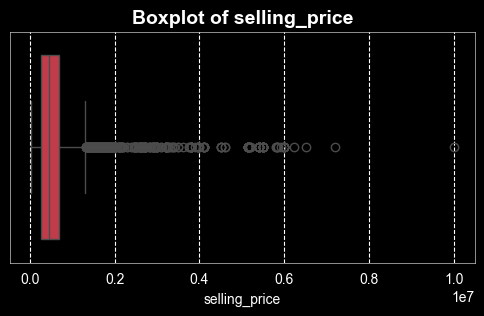

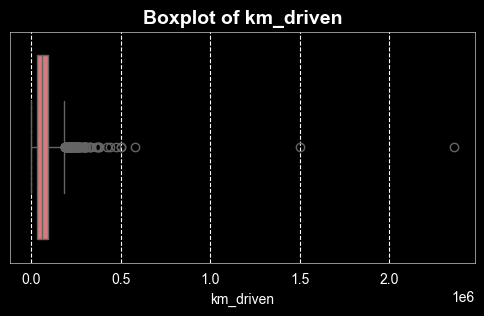

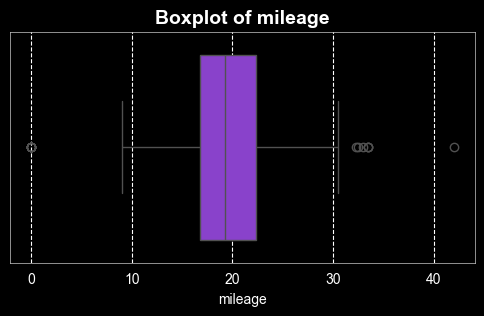

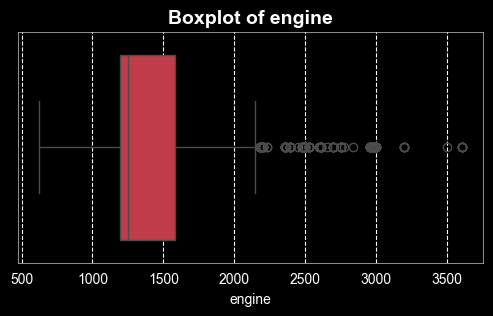

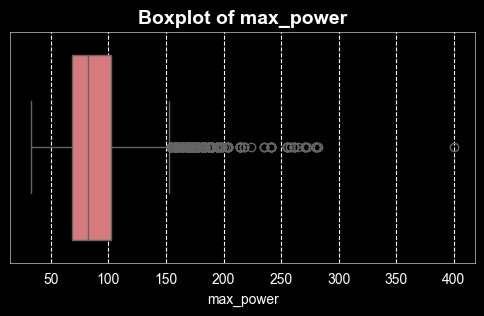

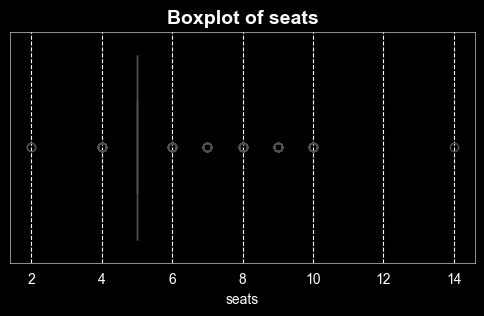

In [172]:
# Boxplots to check outliers
numeric_cols = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data[col], color=theme_colors[i % len(theme_colors)])
    plt.title(f'Boxplot of {col}', color='white')
    plt.xlabel(col, color='white')
    plt.show()


#### Observation:
**1. Boxplot of Selling Price**
- The majority of cars have selling prices below ₹2,00,000.
- There are several outliers with very high selling prices.

**2. Boxplot of Kilometers Driven**
- Most cars have been driven less than 1,00,000 km.
- A few outliers exist, with some cars having been driven over 2,00,000 km.

**3. Boxplot of Mileage**
- The majority of cars have mileage between 15–25 kmpl.
- Outliers exist, with some cars having very low or very high mileage.

**4. Boxplot of Engine Size**
- Most cars have engine sizes between 1,000–1,500 cc.
- Outliers exist, with some cars having very large engine sizes (above 3,000 cc).

**5. Boxplot of Max Power**
- Most cars have max power between 50–150 bhp.
- Outliers exist, with some cars having very high max power (above 300 bhp).

**6. Boxplot of Seats**
- Most cars have 5 seats.
- A few outliers exist, with cars having 2, 6, or more than 7 seats.

In [18]:
print(data.shape)
data.columns

(7906, 13)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

# 👩‍🔬 Step-by-Step Feature Engineering

## 1. Drop Irrelevant or Redundant Columns

In [19]:
# Extract brand from name
data['brand'] = data['name'].apply(lambda x: x.split()[0])
data.drop(['name', 'torque'], axis=1, inplace=True)
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,Hyundai
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,Maruti
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,Tata


In [20]:
data.to_csv('../data/cleaned_car_details.csv', index=False)

## 2. Feature Creation
**🚗 Car Age**
More useful than manufacturing year.

In [125]:
data['age'] = 2025 - data['year']
data.drop('year', axis=1, inplace=True)
data.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'brand', 'age'],
      dtype='object')

In [126]:
# Encoding and Scaling
# One-hot encoding
# data = pd.get_dummies(data, columns=['fuel', 'seller_type', 'transmission', 'brand', 'owner'], drop_first=True)
# Scale numerical features
# scaler = StandardScaler()
# data[['km_driven', 'age']] = scaler.fit_transform(data[['km_driven', 'age']])
# Save preprocessed data
# data.to_csv('../data/preprocessed_car_details.csv', index=False)

## 3. Encoding Categorical Features
Let’s look at each and choose smart encoding: <br>
**🔷 seller_type**<br>
Ordinal? Nah. One-hot is best.<br>
You already did: ✅ Perfect.<br>
**🔷 owner** has ordinal nature:<br>
First Owner > Second Owner > Third ...<br>
So Label Encoding might capture that order better.<br>
**🔷 transmission** <br>
Only 2 values → Binary Encoding = perfect.

In [127]:
data

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,11
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,11
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,19
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,15
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,18
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,Hyundai,12
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,Hyundai,18
8125,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,Maruti,16
8126,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,Tata,12


In [128]:
# Encoding and Scaling
# Binary Encoding for transmission
data['transmission'] = data['transmission'].map({'Manual': 0, 'Automatic': 1})

# Label Encoding for owner
owner_map = {
    'Test Drive Car': 4,
    'Fourth & Above Owner': 3,
    'Third Owner': 2,
    'Second Owner': 1,
    'First Owner': 0
}
data['owner'] = data['owner'].map(owner_map)

# One-hot encoding
data = pd.get_dummies(data, columns=['seller_type', 'fuel', 'brand'], drop_first=True, dtype=int)
data

,selling_price,km_driven,transmission,owner,mileage,engine,max_power,seats,age,seller_type_Individual,...,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_Opel,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,450000,145500,0,0,23.40,1248.0,74.00,5.0,11,1,...,0,0,0,0,0,0,0,0,0,0
1,370000,120000,0,1,21.14,1498.0,103.52,5.0,11,1,...,0,0,0,0,0,1,0,0,0,0
2,158000,140000,0,2,17.70,1497.0,78.00,5.0,19,1,...,0,0,0,0,0,0,0,0,0,0
3,225000,127000,0,0,23.00,1396.0,90.00,5.0,15,1,...,0,0,0,0,0,0,0,0,0,0
4,130000,120000,0,0,16.10,1298.0,88.20,5.0,18,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,0,0,18.50,1197.0,82.85,5.0,12,1,...,0,0,0,0,0,0,0,0,0,0
8124,135000,119000,0,3,16.80,1493.0,110.00,5.0,18,1,...,0,0,0,0,0,0,0,0,0,0
8125,382000,120000,0,0,19.30,1248.0,73.90,5.0,16,1,...,0,0,0,0,0,0,0,0,0,0
8126,290000,25000,0,0,23.57,1396.0,70.00,5.0,12,1,...,0,0,0,0,0,0,1,0,0,0


## 4. Outlier Handling
- Check boxplots or z-scores on `engine, max_power`
- Remove points that are extreme (like 3+ std dev away)


In [129]:
from scipy.stats import zscore
data = data[(np.abs(zscore(data[['engine', 'max_power']])) < 3).all(axis=1)]
print(data.shape)

(7772, 44)


In [130]:
data.columns

Index(['selling_price', 'km_driven', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'seats', 'age', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'brand_Ashok', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land',
       'brand_Lexus', 'brand_MG', 'brand_Mahindra', 'brand_Maruti',
       'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel',
       'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota',
       'brand_Volkswagen', 'brand_Volvo'],
      dtype='object')

## 5. Scaling Numerical Features 

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['km_driven', 'age', 'engine', 'max_power', 'mileage']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Save scaler
joblib.dump(scaler, '../models/scaler.pkl')

print(data.shape)
data.columns

(7772, 44)


Index(['selling_price', 'km_driven', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'seats', 'age', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'brand_Ashok', 'brand_Audi', 'brand_BMW',
       'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat',
       'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land',
       'brand_Lexus', 'brand_MG', 'brand_Mahindra', 'brand_Maruti',
       'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel',
       'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota',
       'brand_Volkswagen', 'brand_Volvo'],
      dtype='object')

## 6. Export Final Clean Data

In [132]:
data.to_csv('../data/preprocessed_car_details.csv', index=False)

# 🤖 Model Training & Evaluation

In [133]:
# Define features and target
X = data.drop(['selling_price'], axis=1)
y = data['selling_price']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 💡 Define the function to train + evaluate + save + plot

In [134]:
# Define function to train, evaluate, and save models
def train_and_evaluate(model, model_name):
    print(f'\n🔧 Training: {model_name}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'📉 Mean Squared Error: {mse:.2f}')
    print(f'📈 R² Score: {r2:.2f}')
    
    # Save model
    joblib.dump(model, f'../models/{model_name.replace(" ", "_").lower()}.pkl')
    
    # Plot actual vs. predicted
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Price (INR)')
    plt.ylabel('Predicted Price (INR)')
    plt.title(f'{model_name}: Actual vs. Predicted')
    plt.tight_layout()
    plt.savefig(f'../visuals/{model_name.replace(" ", "_").lower()}.png')
    plt.close()
    
    return r2

## 🧠 Train All Models  

In [136]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
# Train all models
models = [
    (LinearRegression(), 'Linear Regression'),
    (Ridge(alpha=1.0), 'Ridge Regression'),
    (Lasso(alpha=0.1), 'Lasso Regression'),
    (DecisionTreeRegressor(random_state=42), 'Decision Tree'),
    (RandomForestRegressor(n_estimators=100, random_state=42), 'Random Forest'),
    (GradientBoostingRegressor(n_estimators=100, random_state=42), 'Gradient Boosting'),
    (XGBRegressor(n_estimators=100, random_state=42, verbosity=0), 'XGBoost')
]

model_scores = {}
for model, name in models:
    r2 = train_and_evaluate(model, name)
    model_scores[name] = r2


🔧 Training: Linear Regression
📉 Mean Squared Error: 82995536705.01
📈 R² Score: 0.85

🔧 Training: Ridge Regression
📉 Mean Squared Error: 83657439762.75
📈 R² Score: 0.85

🔧 Training: Lasso Regression
📉 Mean Squared Error: 82939865458.73
📈 R² Score: 0.85

🔧 Training: Decision Tree
📉 Mean Squared Error: 20350405008.85
📈 R² Score: 0.96

🔧 Training: Random Forest
📉 Mean Squared Error: 9899561705.85
📈 R² Score: 0.98

🔧 Training: Gradient Boosting
📉 Mean Squared Error: 14290672900.29
📈 R² Score: 0.97

🔧 Training: XGBoost
📉 Mean Squared Error: 11769745408.00
📈 R² Score: 0.98


## 🔍 Key Takeaways:
**📉 Linear / Ridge / Lasso (Baseline Models):**
- All three are linear models with similar R² ≈ 0.85
- MSE is massive (in tens of billions 💀)
- They're okay for baseline, but clearly underfitting the data.

**🌳 Tree-Based Models**
**🟡 Decision Tree:**
- R² = 0.96 → Much better!
- But high chance of overfitting on training data (Decision Trees are notorious for that)
**🟢 Random Forest:**
- R² = 0.98 (🔥 Superb!)
- MSE is lowest among all (around 9.89B) ➝ accurate predictions
- Much more robust than a single tree
**🟢 XGBoost:**
- R² = 0.98 (same as RF, maybe slightly more stable)
- Handles bias-variance tradeoff really well
- Best model if you want performance + speed

**🟠 Gradient Boosting:**
- R² = 0.97 ➝ slightly lower than RF/XGB
- Still a solid model, but a tad behind RF and XGBoost

**✅ Final Decision**

| Ranking | Model                  | Why?                                                     |
|---------|------------------------|----------------------------------------------------------|
| 🥇 #1   | Random Forest / XGBoost| Best accuracy (R² = 0.98), low error, reliable           |
| 🥈 #2   | Gradient Boosting       | Great performance but a step behind the top models       |
| 🥉 #3   | Decision Tree           | High R² (0.96) but likely overfitting the training data  |
| 🚫      | Linear, Ridge, Lasso    | Good for baseline, but not good enough for this dataset  |


# 🔎 Feature Importance (Random Forest & XGBoost)
This tells us which features the model thinks matter most in predicting price.

### 📌 For Random Forest:

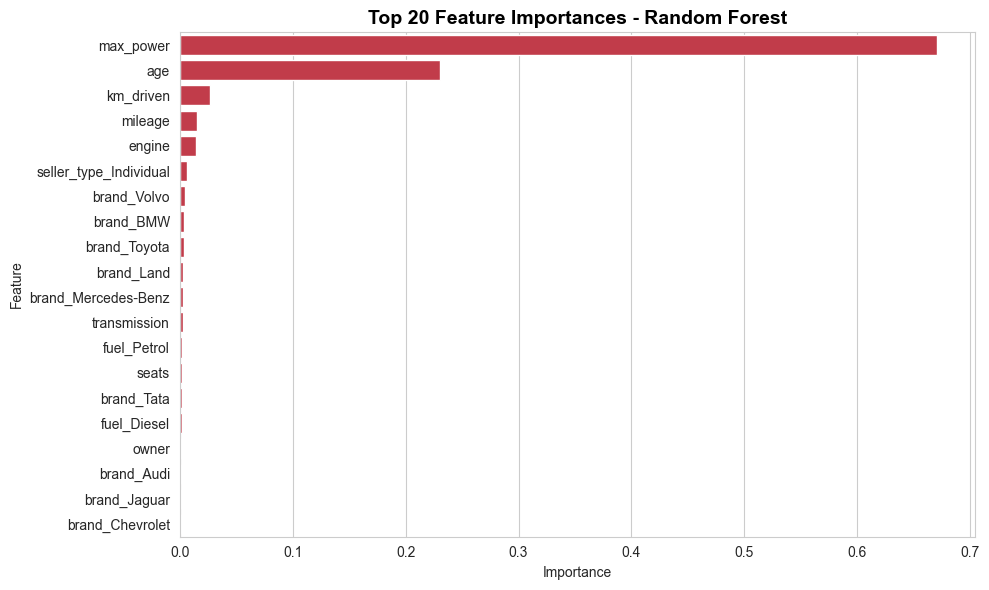

In [137]:
# Get feature importances
rf_model = joblib.load('../models/random_forest.pkl')
importances = rf_model.feature_importances_

# Match with feature names
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.savefig('../visuals/random_forest_feature_importance.png')
plt.show()


### 📌 For XGBoost:

<Figure size 1000x600 with 0 Axes>

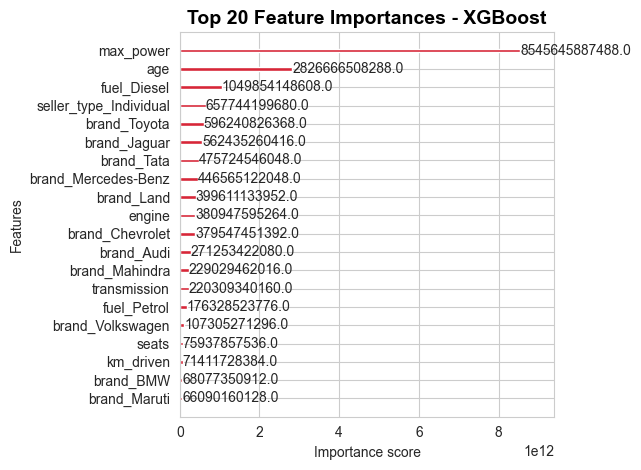

In [138]:
xgb_model = joblib.load('../models/xgboost.pkl')

# Plot using built-in function
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=20, importance_type='gain')
plt.title('Top 20 Feature Importances - XGBoost')
plt.tight_layout()
plt.savefig('../visuals/xgboost_feature_importance.png')
plt.show()


## 🔥Insights:
From the Random Forest and XGBoost plots, it's crystal clear that:
- max_power and age are dominating the game.
- Other features like km_driven, mileage, and engine are somewhat important
- Brands, fuel type, and ownership… yeah, not doing much

# 🔧 Hyperparameter Tuning (for Boosting Performance)
We’ll do this for Random Forest, XGBoost, and Gradient Boosting (since they showed strong results).
Here’s a basic RandomizedSearchCV setup (for speed + effectiveness):

In [96]:
# Random Forest Tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(rf, rf_params, n_iter=10, cv=3, scoring='r2', n_jobs=-1)
rf_random.fit(X_train, y_train)

print('Best Random Forest Params:', rf_random.best_params_)

Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}


In [97]:
# XGBoost Tuning
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

xgb = XGBRegressor(random_state=42)
xgb_random = RandomizedSearchCV(xgb, xgb_params, n_iter=10, cv=3, scoring='r2', n_jobs=-1)
xgb_random.fit(X_train, y_train)

print('Best XGBoost Params:', xgb_random.best_params_)

Best XGBoost Params: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [98]:
# Gradient Boosting Tuning
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

gb = GradientBoostingRegressor(random_state=42)
gb_random = RandomizedSearchCV(gb, gb_params, n_iter=10, cv=3, scoring='r2', n_jobs=-1)
gb_random.fit(X_train, y_train)

print('Best GBM Params:', gb_random.best_params_)

Best GBM Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}


## ✅ What These Best Params Tell Us
**🌲 Random Forest:**
- `n_estimators: 100` → Decent number of trees, avoids overfitting.
- `max_depth: 30` → Deep enough to capture patterns, but not crazy deep.
- `min_samples_split: 5`, `min_samples_leaf: 1` → Prevents it from making weird tiny leaf nodes.
- `bootstrap: True` → Classic bootstrapped RF, keeps variance low.

**⚔️ XGBoost:**
- `max_depth: 5` → Not too deep, good balance of bias-variance.
- `learning_rate: 0.2` → A bit aggressive, but with 100 trees it works.
- `subsample: 0.7`, `colsample_bytree: 0.8` → Adds randomness = less overfitting.
- Great combo for small-to-medium tabular data.

**📈 Gradient Boosting:**
- `n_estimators: 200` → More trees but slow & steady with:
- `learning_rate: 0.1` → Standard + effective.
- `subsample: 0.8`, `max_depth: 5` → Again, helps generalization.

# 💡 Final Model Training with Best Params & Pick the Best
1. Train final models with these parameters on full training data (use X_train, y_train).
2. Save the best one (whichever gives best test R²) using joblib.dump()

In [99]:
# Train models with best parameters
rf = RandomForestRegressor(
    n_estimators=rf_random.best_params_['n_estimators'],
    min_samples_split=rf_random.best_params_['min_samples_split'],
    min_samples_leaf=rf_random.best_params_['min_samples_leaf'],
    max_depth=rf_random.best_params_['max_depth'],
    bootstrap=rf_random.best_params_['bootstrap'],
    random_state=42
)

xgb = XGBRegressor(
    subsample=xgb_random.best_params_['subsample'],
    n_estimators=xgb_random.best_params_['n_estimators'],
    max_depth=xgb_random.best_params_['max_depth'],
    learning_rate=xgb_random.best_params_['learning_rate'],
    colsample_bytree=xgb_random.best_params_['colsample_bytree'],
    random_state=42
)

gbm = GradientBoostingRegressor(
    subsample=gb_random.best_params_['subsample'],
    n_estimators=gb_random.best_params_['n_estimators'],
    max_depth=gb_random.best_params_['max_depth'],
    learning_rate=gb_random.best_params_['learning_rate'],
    random_state=42
)

# Evaluate tuned models
tuned_models = {
    'Random Forest': rf,
    'XGBoost': xgb,
    'Gradient Boosting': gbm
}

best_model = None
best_r2 = -1
best_model_name = ''

for name, model in tuned_models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    print(f'{name} => R2: {r2:.4f} | RMSE: {rmse:.2f}')
    if r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_model_name = name

print(f'\n🔥 Best Model: {best_model_name} with R2: {best_r2:.4f}')

# Save best model and scaler
joblib.dump(best_model, '../models/best_model.pkl')


Random Forest => R2: 0.9816 | RMSE: 99858.23
XGBoost => R2: 0.9815 | RMSE: 100123.17
Gradient Boosting => R2: 0.9768 | RMSE: 112146.27

🔥 Best Model: Random Forest with R2: 0.9816


['../models/best_model.pkl']

# 🚀 Next Steps
- Make a prediction script or app (Streamlit or Flask).
- Create a clean project folder with:Edit
